# 模型
- 模型是通过继承Odoo 模板的Python来实现的，创建了模型之后，odoo会同ORM引擎在数据库自动创建表
## 模型的种类
- models.Model
- models.TransientModel(瞬态模型）
    - 可用于向导式用户交互，其数据也是存储于数据库表的，只不过是临时存储，会有作业定期从这些表中删除老数据
- models.AbstractModel(抽象模型）
- 没有数据库表为其存储数据，仅仅是为了方便子类复用字段或方法，自己本身并不需要存储数据
        

### 模型的属性字段（用于描述整个模型）：
- _name:（模型）类的唯一标识字段，其他类（模型）可以通过该字段来引用本类
- _description:类似于标签，提高查询的友好性
- _order:设置该模型的记录集展示时默认的排序字段
- _rec_name:是record name的缩写，用来指定一个字段作为该记录的描述，一般来讲，odoo默认使用name字段作为一条记录的描述
- _table:指定该模型映射在数据库中的表名
- _inherit：继承，可以继承一个（str）或多个(list)
- _iherits：这个有点特殊
    - dict(parent model: m2o field):表示将父业务对象的_name映射到要使用的相应外键字段的名称:
            _inherits = {
                'a.model': 'a_field_id',
                'b.model': 'b_field_id'
            }
    - 实现基于组合的继承:新模型公开继承模型的所有字段，但不存储它们:值本身仍然存储在链接的记录中。
- _register:表示注册时是否实例化该模型，该模型是否可见，默认为True
- _auto:表示是否为该模型在数据库中创建对应的数据库表，Model和TransientModel类型默认为True，Abstract Model为False
- _log_access:ORM是否应该自动生成和更新访问日志字段，即模型自动创建的字段(create_date,create_uid,write_uid,write_date).默认为_auto设置的任何值
- _abstract：模型是否抽象模型，多个继承模型

- _transient：模型是否临时模型，用于临时数据，存储在数据库中经常自动清理
- _parent_name = 'parent_id'：many2one字段用作父字段
- _sequence:id字段的sql序列（目前不明白什么意思，但是应该和排序有关)


### 模型字段的参数
- （1） 字段名：小写字母，下划线命名法，含义清楚完整，尽量不使用缩写。string: 首字母大写。
- （2） default：默认值，可以为函数。
- （3） index：为频繁read、不频繁write的字段建立索引：index=True（old_api: select）。
- （4） auto_join: 为频繁链式读取的字段在建立joins：employee.user_id.login 则hr.employee模型中的user_id应auto_join=True。
- （5） translate：value需要翻译的字段使用：translate=True，支持的字段类型：char、text、html，通常应用在配置数据、模板数据中，而非业务数据。
- （6） ondelete：many2one字段谨慎使用 ondelete=‘cascade’ .
- （7） relation、column1、column2：many2many字段，在两边模型都声明关联字段时，需要显式指定关联表及关联字段名称。
- （8） store：是否将字段值存储在数据表中，常规字段默认store=True，store=False时，不会在数据表中创建该列。
    - 在声明compute、related属性时，api.depends(fields)，fields定义recompute 的条件
- （9） compute：依赖store属性。
    store=False时：该字段值根据compute指定的function动态计算（on-the-fly）
    store=True时：创建该记录时，自动计算一次，存储在数据表中。编辑当前记录时，也会重新计算。
- （10） related：已默认为readonly=True，在历史业务单据中，一般需要保留当时值的情况下，需要加store=True；对于特殊场景需要store=True且保持更新的情况下，添加update=True属性。
    - 不允许related='field1.field2’中的field2是一个store=False的字段。
- （11） inverse：类似于old api中的fuct_inv，同compute一起应用，给字段/记录赋值。
- （12） search：搜索前处理/扩展domain条件，应用于关系型字段，返回值时domain。效果等同于name_search方法，但是参数不同。
- （13） compute_sudo：当使用superuser查询该字段时是否要重新计算，对存储字段是默认是True，对非存储字段是False。
- （14） related_sudo：related _sudo=True表示使用SUPERUSER_ID计算related值。
- （15） company_dependent：old api中的property字段。
- （16） digits：精度控制元组，(total, decimal)，应用于float字段。
- （17） size：char类型字段的字符长度。
- （18） required：是否必填
- （19） readonly：是否只读
- （20） states：控制某些state条件下字段的readonly、required、invisible属性，如：states={‘draft’:[(‘readonly’,False)], ‘confirm’:[(‘required’,False)]}
- （21） help：提示信息（Tooltip）
- （22） groups：逗号分隔的用户组（完整的xml_id）
- （23） copy：copy=False时，复制record数据时不包含该字段值。
- （24） domain：过滤条件，应用于关系型字段，value可以是一个函数来生成domain。
- （25） context：context传递变量，应用于关系型字段。
- （26） limit：one2many、many2many默认的limit数量（80）。
- （27） deprecated:如果设置为True，则一旦使用该字段，日志中记录警告信息
- （28） oldname：如果一个字典在新版本中更改了名字，则可以使用该属性记录老版本的名字
- （29） group_operator：当对该字段进行分组时，使用的聚合函数类型，默认情况下，使用的聚合是sum。聚合函数类型有如下：
        array_agg : values, including nulls, concatenated into an array
        count : number of rows
        count_distinct : number of distinct rows
        bool_and : true if all values are true, otherwise false
        bool_or : true if at least one value is true, otherwise false
        max : maximum value of all values
        min : minimum value of all values
        avg : the average (arithmetic mean) of all values
        sum : sum of all values
- （30） group_expand：对read_group()返回结果的扩展，比如分组有些结果是0，read_group并不会返回，但是为了展示所有的分组项，就可以通过group_expand定义一个函数返回所有的分组项
                read_group()函数：
                read_group(self, domain, fields, groupby, offset=0, limit=None, orderby=False, lazy=True)，lazy为TRUE表示只返回fields中第一个field的分组情况

                stage_id = fields.Many2one('survey.stage', string="Stage", default=_default_stage,
                               ondelete="restrict", copy=False, group_expand='_read_group_stage_ids')
                @api.model
                def _read_group_stage_ids(self, stages, domain, order):
                    """ Read group customization in order to display all the stages in the
                        kanban view, even if they are empty
                    """
                    stage_ids = stages._search([], order=order, access_rights_uid=SUPERUSER_ID)
                    return stages.browse(stage_ids)
- （31） track_visibility：追踪一个字段的变化情况（谁改变了他）并记录下来，，但是这个模型需要继承mail.thread,可选值为onchange(表示只有当该字段进行更改时才进行记录）,always
-  automatic:是否自动创建该字段
-  args:是一个字典，用来传递个model的__init参数
-  _module:该字段的模块名
-  _modules: 用来定义该字段的模块名
-  _sequence:字段的绝对排序
-  manual:该字段是否是自定义的字段，默认为FALSE
-  recursive：是否依赖于自身
-  compute_sudo:是否以管理员身份重新计算该字段
-  related_sudo：该关系字段是否以管理员身份读取

### 模型的字段类型
- fields.Char()
    - 参数：size，trim，translate
    - trim说明：表示值是否被修剪(默认为True)。注意，修剪操作只应用于web客户端
- fields.Text()
    - translate
- fields.Selection()  下拉框
    - 参数：selection,selection_add(在重写字段时向原来的selection进行添加)，ondelete
    - fields.Selection(selection=[("db_value", "front_value"), string=""]
            selection = [('a', 'A'), ('b', 'B')]
            selection_add = [('c', 'C'), ('b',)]
            > result = [('a', 'A'), ('c', 'C'), ('b', 'B')]
    - ondelete:使用selection_add为任何被覆盖的字段提供回退机制。它是一个将selection_add中的每个选项映射到回退操作的字典
- fields.Html("文档")
    - sanitize:是否必须对值进行消毒(默认值:True)
    - sanitize_tags：是否接受一些指定的标签，默认为TRUE
    - sanitize_style：是否要清除样式属性，默认为FALSE
    - strip_style：移除效果但不删除该样式属性，默认为FALSE
    - strip_classes：移除类但不删除，默认为FALSE
- fields.Integer(), Float(string, digits),digits是一个元组，前面代表总位数，后面代表小数精度
- fields.Date(), Datetime
    - 可赋值给他们的类型有：date、datetime、str样式的YYYY-MM-DD（给Date），YYYY-MM-DD HH:MM:SS（给Datetime)
    - Date方法：
        - to_date(val):将val转化为date类型
        - add(val, args, kwargs):增加时间，比如增加8小时add(now, hours=8)
        - context_today(record,timestamp=None):获取本地时区今天的日期，
            - timestamp：可选的datetime值，用来代替当前日期和时间(必须是一个datetime，常规日期不能在时区之间转换)。
        - end_of(value, granularity)：返回当前granularity最后的一个点，granularity可以为day，hour，minute
        - start_of(value, granularity):
        - subtract(val, args, kwargs):日期相减
        - to_string(val)
        - today():当天的日期
    - Datetime方法：
        - to_datetime(val):
        - add:
        - context_timestamp(record, timestamp)返回转换为客户端时区的给定时间戳
            - timestamp:要转换为客户端时区的原始datetime值(UTC表示)。
        - now():当前的时间
        - to_string
        - subtract
        - start_of
        - end_of
        
- fields.Reference
    - 假关联字段，可以像'res_model.res_id'这样使用，但是该字段是以string的形式存储在数据库中而不是以关联字段的形式
    - 示例如下：
            `reference = fields.Reference(string='Related Document',
                                 selection='_reference_models')
            @api.model
            def _reference_models(self):
                models = self.env['ir.model'].sudo().search([('state', '!=', 'manual')])
                return [(model.model, model.name)
                        for model in models
                        if not model.model.startswith('ir.')]`
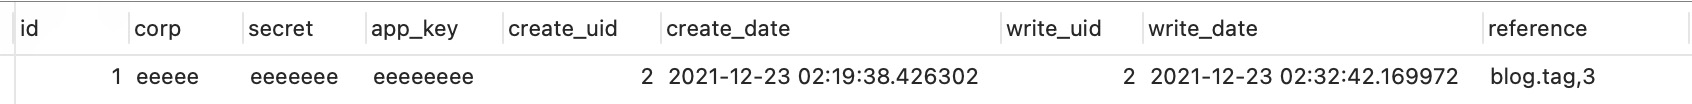

- fields.Many2oneReference
    - 多对一假关联字段
    - 使用它必须要在该模型中先定义一个char字段，该字段指明是哪个模型，然后在Many2oneReference中的model_field指定值为该字段
    - 示例：
            model = fields.Char('Related Document Model', index=True)
            res_id = fields.Many2oneReference('Related Document ID', index=True, model_field='model')
- fields.Boolean()
- fields.Binary()
    - 参数attachment：该字段是否应该存储为ir附件或模型表的列(默认值:True)
- fields.Image()
    - 是Binary的扩展
    - max_width：
    - verify_resolution：是否要验证最大分辨率，默认为FALSE
    - max_height：
    - 如果说长宽皆为0，且不验证分辨率，那建议使用binary代替

#### 模型里面的保留字段（即在创建数据库时会默认创建的字段）
- 作为开发人员不能修改保留字段
- 字段有以下：
    - id:这是记录的唯一标识
    - create_date：记录创建的日期
    - create_uid：记录创建的用户
    - write_date：记录最后的修改日期
    - write_uid:记录最后修改的用户
    - _last_update:该字段不会实际存储值，仅起到并发检查的作用

### view中常见字段属性
- （1） string
- （2） domain
- （3） invisible
- （4） required
- （5） readonly
- （6） password
- （7） groups
- （8） context
- （9） states:
        <footer states="choose">
            <button name="act_getfile" string="Export" type="object" class="btn-primary"/>
            <button special="cancel" string="Cancel" type="object" class="btn-default"/>
        </footer>
        <footer states="get">
            <button special="cancel" string="Close" type="object" class="btn-primary"/>
        </footer>

- （10） attrs：attributes
- （11） ref：常用在data数据中指定xml_id
- （12） eval：
- （13） on_change:
- （14） sum：该列是否在视图合计，sum=字符串名称。
- （15） widget：url, float_time, percent, color, no_sep, short_time…
- （16） width、img_width：
- （17） height、img_height
- （18） filename：二进制字段的显示名称。
- （19） options：no_create、no_open、limit等
- （20） placeholder：






In [12]:
import re
key = 'ILoveYou'
res = re.findall(r'[A-Z]', 'ILoveYou')
final_val = ''
for i in key:
    if i in res:
        final_val += '_' + i.lower()
    else:
        final_val += i

print(final_val)

_i_love_you


In [7]:
a = 'IloveYou'
print(a.lower())

iloveyou


In [3]:
from datetime import date
help(date)

Help on class date in module datetime:

class date(builtins.object)
 |  date(year, month, day) --> date object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(...)
 |      Formats self with strftime.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __radd__(self, value, /)
 |      Return value+self.
 |  
 |  __reduce__(...)
 |      __reduce__() -> (cls, state)
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __rsub__(self, value, /)
 |      Return value-self.
 |  
 |  _